In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

import numpy as np

In [3]:
# 파일 경로
file_path = '/content/cmm_data.csv'

# 데이터 불러오기
data = pd.read_csv(file_path, encoding='cp949')

In [4]:
# 결측치 및 데이터 타입 확인
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(파일명                                    0
 평면1,평면도                                0
 원1(I) <상>,D                            0
 원2(I) <중>,D                            0
 원3(I) <하>,D                            0
                                       ..
 점30 <- 점18의 되부름 <소재원점>,Y               0
 직선25 <- 직선18의 되부름,X/Y                  0
 직선26 <- 직선16의 되부름,X/Y                  0
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    0
 품질상태                                   0
 Length: 67, dtype: int64,
 파일명                                     object
 평면1,평면도                                float64
 원1(I) <상>,D                            float64
 원2(I) <중>,D                            float64
 원3(I) <하>,D                            float64
                                         ...   
 점30 <- 점18의 되부름 <소재원점>,Y               float64
 직선25 <- 직선18의 되부름,X/Y                  float64
 직선26 <- 직선16의 되부름,X/Y                  float64
 거리4 <- XAXIS[평균]:점32와 점31 <소재기준>,DS    float64
 품질상태                          

In [5]:
# '파일명' 열 제외
data_numeric = data.drop(columns=['파일명'])

# 결측치를 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# 데이터프레임으로 변환
data_imputed = pd.DataFrame(data_imputed, columns=data_numeric.columns)

In [6]:
# 독립 변수와 종속 변수 분리
X = data_imputed.drop(columns=['품질상태'])
y = data_imputed['품질상태']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate PCA results with quality status
pca_df['Quality Status'] = y.values

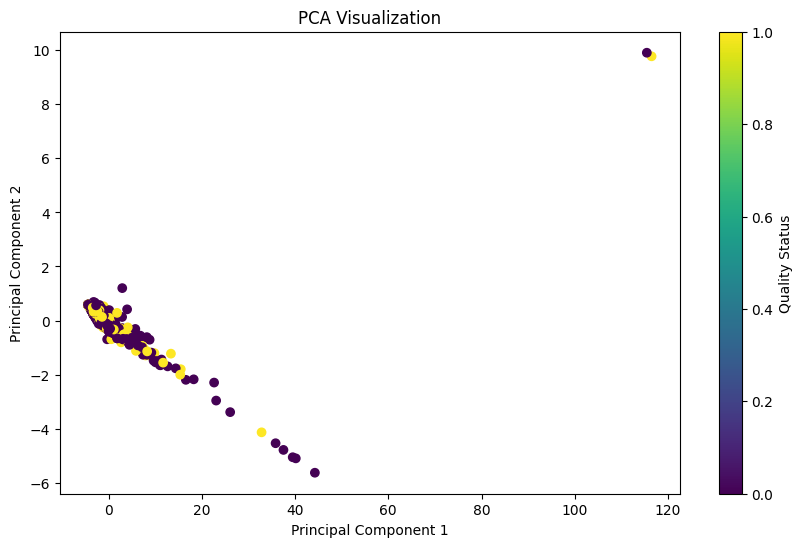

In [8]:
# Visualize the PCA results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Quality Status'], cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Quality Status')
plt.show()